In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from featurewiz import featurewiz
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

Imported 0.1.996 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



# - Data description:

Attribute Information:

scale (0:Not Applicable;1-5)

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service 

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Label:

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# - Importing data:

In [68]:
data=pd.read_csv("Invistico_Airline.csv")

# - Outliers:

In [9]:
def outliersCapping(c):
    upper_limit = data[c].mean() + 3 * data[c].std()
    lower_limit = data[c].mean() - 3 * data[c].std()

    data[c] = np.where(
        data[c] > upper_limit,
        upper_limit,
        np.where(data[c] < lower_limit, lower_limit, data[c]),
    )

In [22]:
def box(data):
    df=data.drop(['satisfaction', 'Gender', 'Customer Type','Type of Travel','Class'],axis=1)
    nonbinary_columns = [column for column in df.columns if len(df[column].unique()) > 2]

    plt.figure(figsize=(20, 20))

    for i, column in enumerate(nonbinary_columns):
        plt.subplot(3, 6, i + 1)
        sns.boxplot(data=df[column],)
        plt.title(column)

    plt.suptitle("Boxplots With Outliers", size=30)
    plt.show()

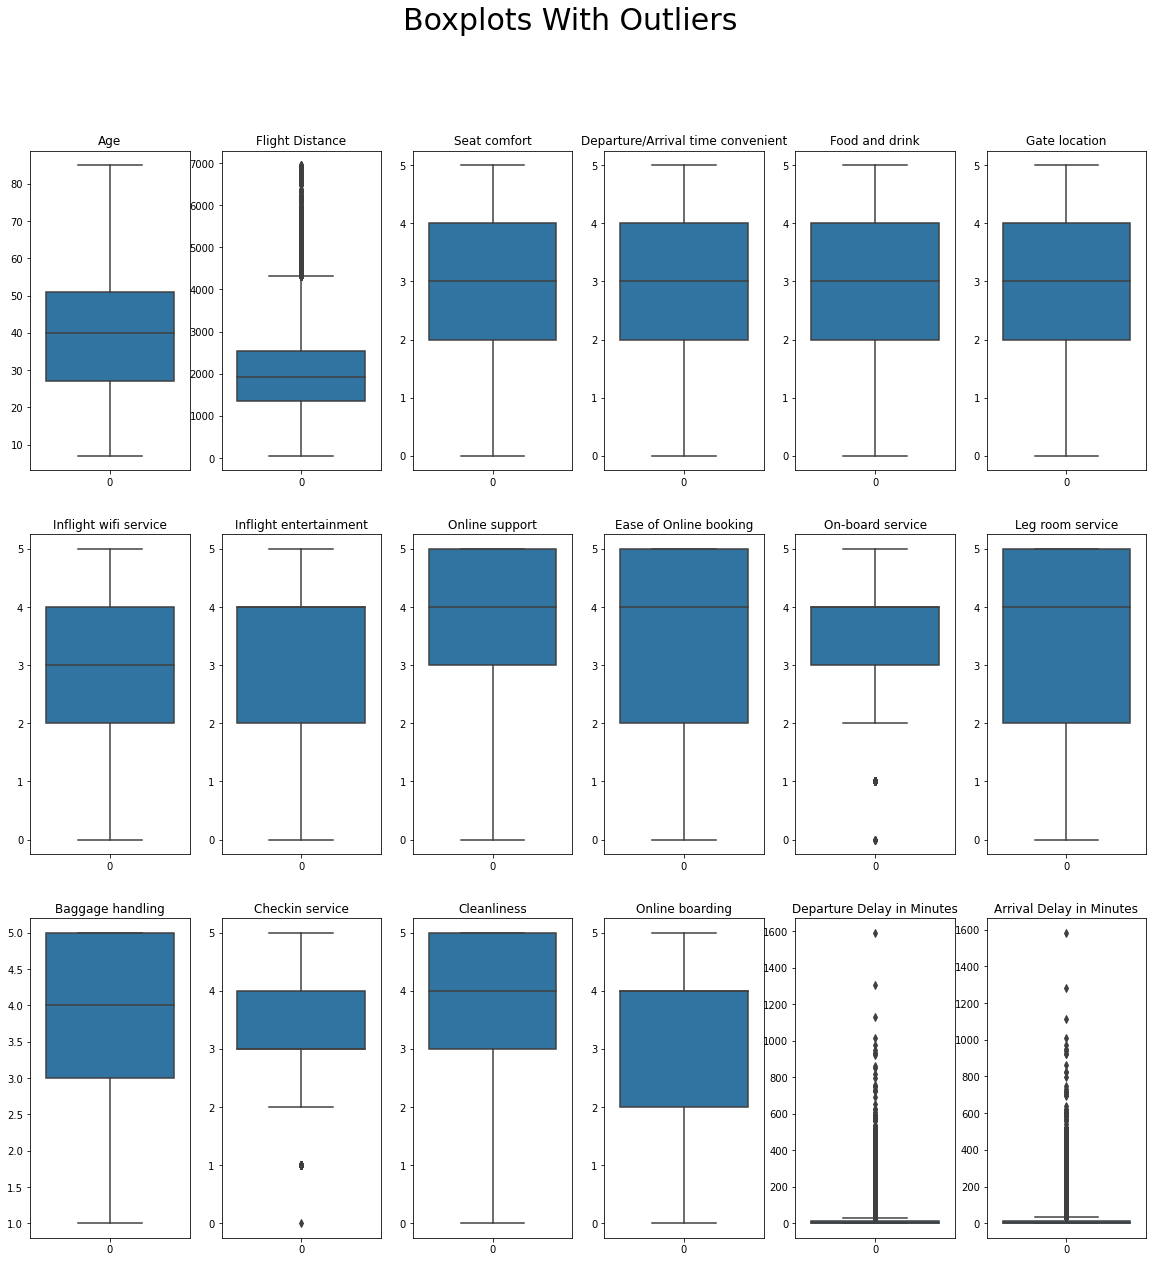

In [23]:
box(data)

In [69]:
outliersCapping('Departure Delay in Minutes')
outliersCapping('Arrival Delay in Minutes')
outliersCapping('Flight Distance')

# - Encoding:

In [70]:
for col in data.columns:
   if data[col].dtype=='object':
       l_en=LabelEncoder()
       data[col] = l_en.fit_transform(data[col])

In [14]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265.0,0,0,0,...,2,3,3,0,3,5,3,2,0.000000,0.00000
1,1,1,0,47,1,0,2464.0,0,0,0,...,2,3,4,4,4,2,3,2,128.927091,130.48808
2,1,0,0,15,1,1,2138.0,0,0,0,...,2,2,3,3,4,4,4,2,0.000000,0.00000
3,1,0,0,60,1,1,623.0,0,0,0,...,3,1,1,0,1,4,1,3,0.000000,0.00000
4,1,0,0,70,1,1,354.0,0,0,0,...,4,2,2,0,2,4,2,5,0.000000,0.00000


# - Feature selection and engineering:

In [71]:
target = "satisfaction"

features, train = featurewiz(
    data,
    target,
    corr_limit=0.8,
    verbose=0,
    sep=",",
    header=0,
    test_data="",
    feature_engg="interactions",
    category_encoders="",
)


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (129880, 23)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
######################## C L

In [72]:
x = train.drop(["satisfaction"], axis=1)
y = train["satisfaction"].values 

In [73]:
scaler=StandardScaler()
x = scaler.fit_transform(x)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =100 ,stratify=y)

# - Modeling:

XGBClassifier
0.9999903757314444
0.9632352941176471
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11759
           1       0.97      0.96      0.97     14217

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

0:	learn: 0.2650477	total: 482ms	remaining: 4.34s
1:	learn: 0.1844300	total: 970ms	remaining: 3.88s
2:	learn: 0.1565313	total: 1.45s	remaining: 3.39s
3:	learn: 0.1391056	total: 2.01s	remaining: 3.01s
4:	learn: 0.1313638	total: 2.56s	remaining: 2.56s
5:	learn: 0.1246014	total: 3.12s	remaining: 2.08s
6:	learn: 0.1151631	total: 3.65s	remaining: 1.57s
7:	learn: 0.1114206	total: 4.17s	remaining: 1.04s
8:	learn: 0.1087521	total: 4.73s	remaining: 526ms
9:	learn: 0.1056839	total: 5.28s	remaining: 0us
CatBoostClassifier
0.9576050970126271
0.9528410840776101
              precision    recall  f1-score   support

           

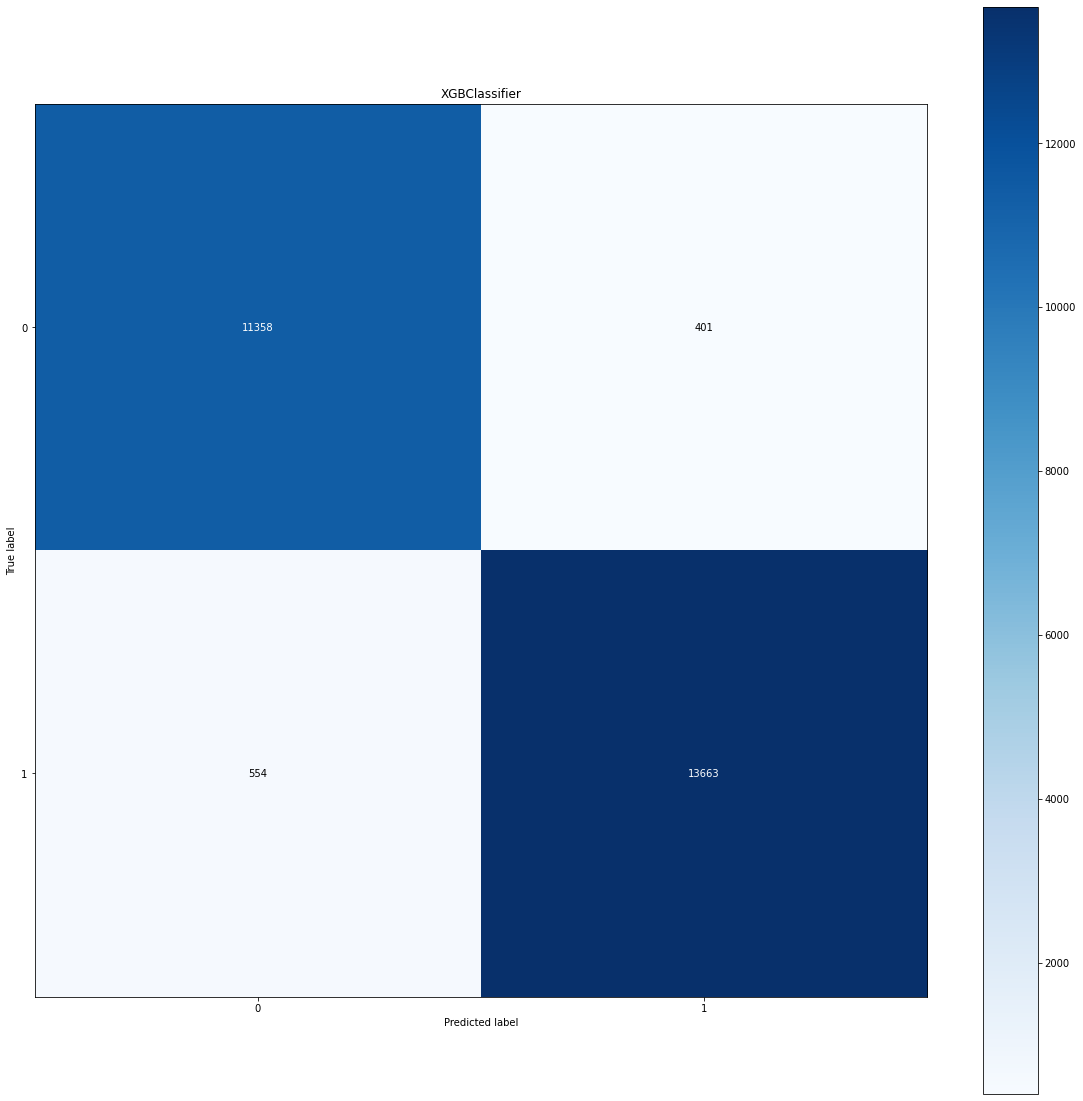

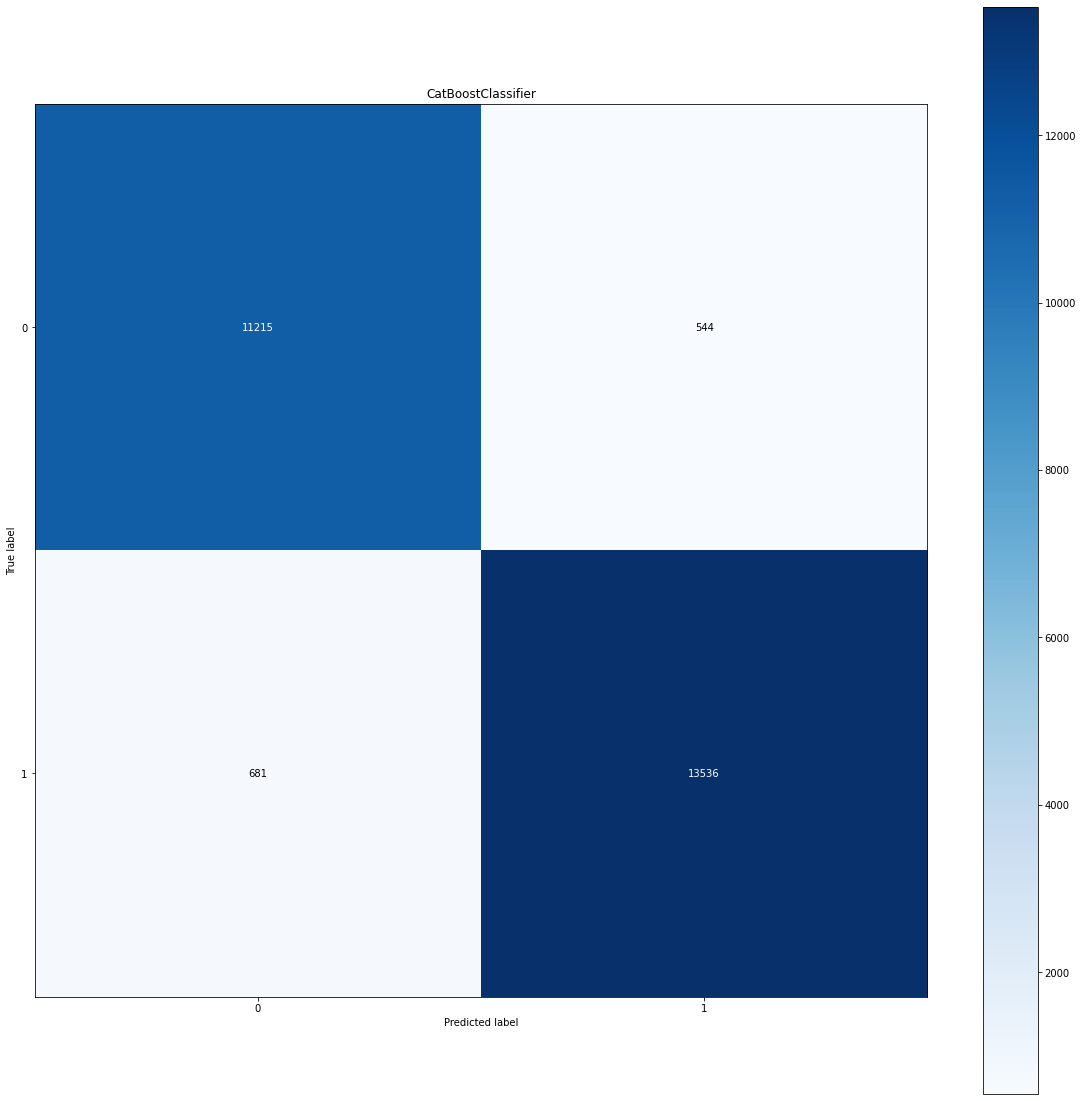

In [ ]:
models = [
    # ('Logistic Regression', LogisticRegression(max_iter=1000)),
    # ('Decision Tree', DecisionTreeClassifier()),
    # ('Random Forest Classifier', RandomForestClassifier()),
    ('XGBClassifier', XGBClassifier(max_depth= 80, max_features= 3, n_estimators= 100,learning_rate=0.1),),
    ('CatBoostClassifier',CatBoostClassifier(max_depth = 10  ,iterations=10, learning_rate=0.4)),
    # ('KNeighborsClassifier',KNeighborsClassifier())



]

predicts=[]
for name, model in models:

    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    predicts.append(y_predict)

    print(name)

    print(model.score(x_train, y_train))
    print(model.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
    skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20), title=name)



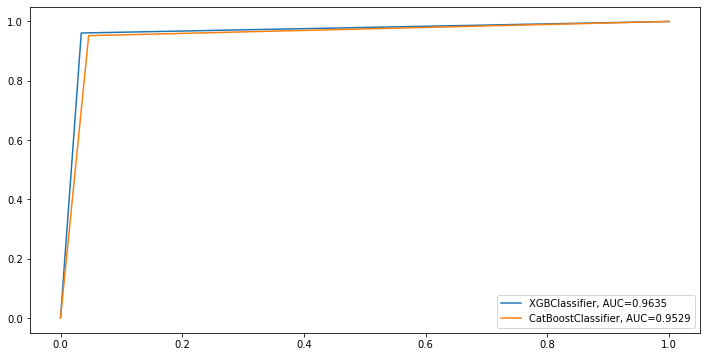

In [76]:
#set up plotting area
plt.rcParams["figure.figsize"] = (12,6)
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y_test, predicts[0])
auc = round(metrics.roc_auc_score(y_test, predicts[0]), 4)
plt.plot(fpr,tpr,label="XGBClassifier, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, predicts[1])
auc = round(metrics.roc_auc_score(y_test, predicts[1]), 4)
plt.plot(fpr,tpr,label="CatBoostClassifier, AUC="+str(auc))

#add legend
plt.legend()

# - Grid search:

In [77]:
x = train.drop(["satisfaction"], axis=1)[:5000]
y = train["satisfaction"][:5000]
scaler=StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =100 ,stratify=y)


In [78]:
param_grid = {
    "max_depth": [80, 90, 100, 110],
    "max_features": [ 3,5,7],
    "n_estimators": [100, 200, 300, 1000],
}

# Create a based model

rf = RandomForestClassifier()
xgb=XGBClassifier()
cat=CatBoostClassifier()
# Instantiate the grid search model

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


# Fit the grid search to the data

grid.fit(x_train, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [79]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 80, 'max_features': 3, 'n_estimators': 100}
0.9990001248438046
